# tSNE DSX

Sharvani was wanting to get a tSNE for her meeting with Van Doren's group shoing dsx.

In [62]:
import os
import sys
from pathlib import Path

from IPython.display import display, HTML, Markdown
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Project level imports
from larval_gonad_ovary.notebook import Nb
from larval_gonad_ovary.plotting import make_figs, TSNEPlot
from larval_gonad_ovary.config import memory

In [63]:
# Setup notebook
nbconfig = Nb.setup_notebook(seurat_dir='../output/scrnaseq-wf/scrnaseq_combine_force')

last updated: 2018-08-20 
Git hash: eb7e3486aa1ed6cc3c23658afd54dacdb200f517


In [64]:
tsne = nbconfig.seurat.get_tsne()

In [65]:
clusters = pd.read_parquet('../output/scrnaseq-wf/clusters.res.0.4.parquet')
tpm = pd.read_parquet('../output/scrnaseq-wf/tpm.parquet')

In [67]:
greys = sns.color_palette('Greys')
reds = sns.color_palette('Reds')
reds[0] = greys[0]

In [81]:
def plot_gene(gene):
    _dat = tpm.T[nbconfig.symbol2fbgn[gene]]
    _dat.name = gene

    df = tsne.join(_dat).join(clusters)

    TSNEPlot(data=df, hue=gene, palette=reds, edgecolor='k')
    ax = plt.gca()
    sns.despine(ax=ax, left=True, top=True, bottom=True, right=True)
    ax.set_title(gene)
    fig = plt.gcf()
    fig.savefig(f'../output/{gene}_tsne.pdf')

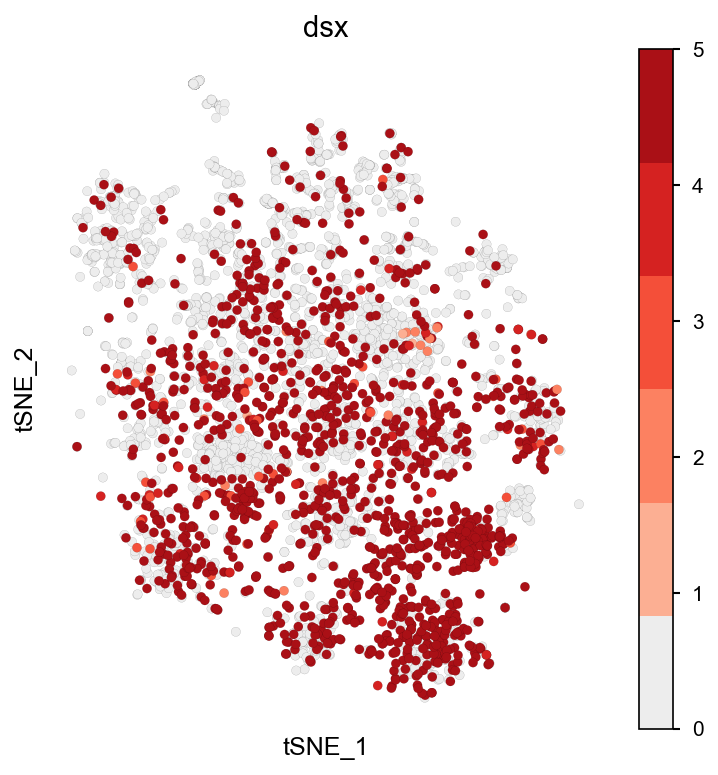

In [82]:
plot_gene('dsx')

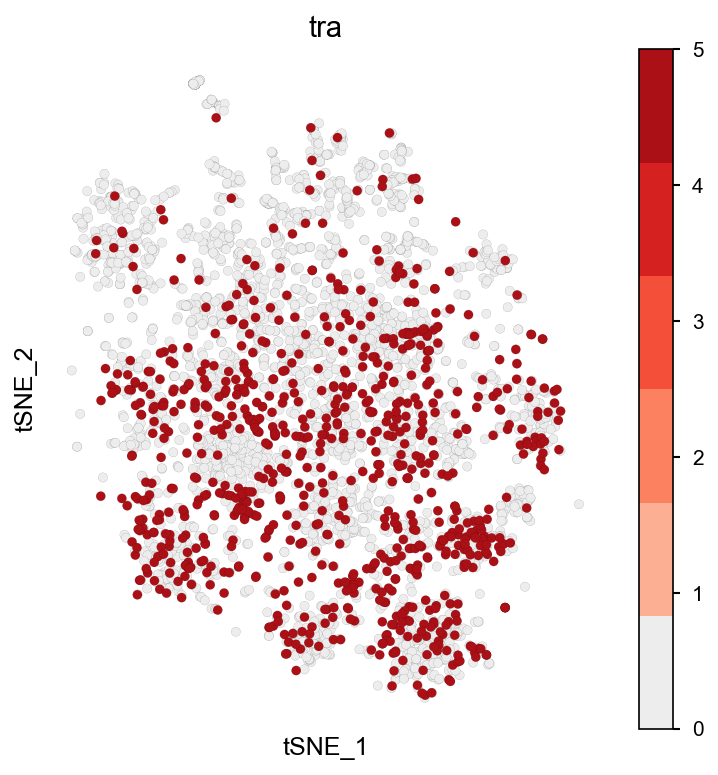

In [83]:
plot_gene('tra')

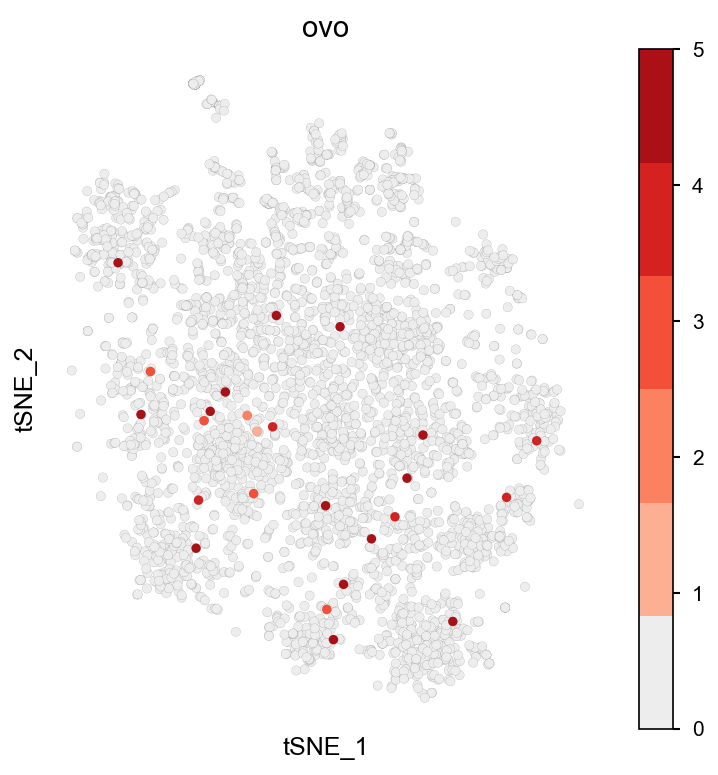

In [84]:
plot_gene('ovo')

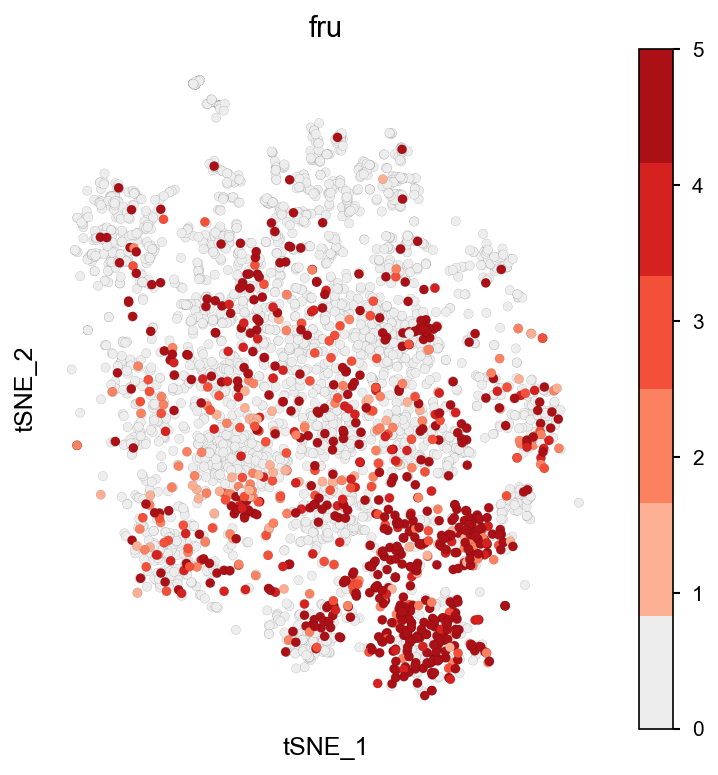

In [85]:
plot_gene('fru')

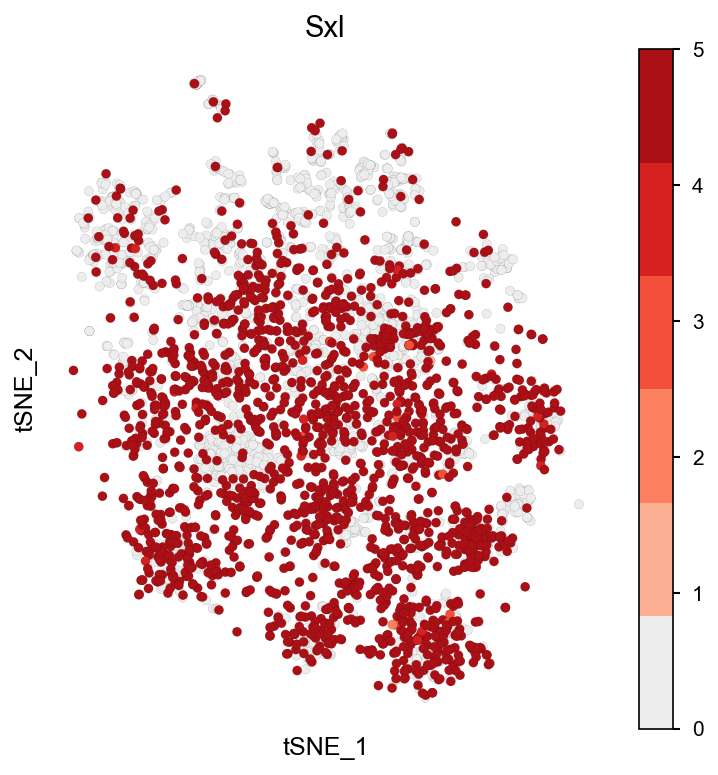

In [86]:
plot_gene('Sxl')